<a href="https://colab.research.google.com/github/transformernlp/explainablility/blob/main/shap_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install shap transformers datasets

     |████████████████████████████████| 358kB 12.0MB/s 
     |████████████████████████████████| 2.3MB 20.7MB/s 
     |████████████████████████████████| 245kB 36.1MB/s 
     |████████████████████████████████| 3.3MB 28.2MB/s 
     |████████████████████████████████| 901kB 31.8MB/s 
     |████████████████████████████████| 245kB 38.2MB/s 
     |████████████████████████████████| 122kB 45.3MB/s 


In [ ]:
import transformers
import datasets
import shap
import numpy as np

In [ ]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a. Subsequent calls will reuse this data.


In [ ]:
short_data[0], short_data[1]

("I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the ",
 'Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I\'m no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was e

In [ ]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:2])

[[{'label': 'NEGATIVE', 'score': 0.0012035154504701495},
  {'label': 'POSITIVE', 'score': 0.9987965226173401}],
 [{'label': 'NEGATIVE', 'score': 0.002218783600255847},
  {'label': 'POSITIVE', 'score': 0.9977812170982361}]]

In [ ]:
explainer = shap.Explainer(classifier)

In [ ]:
shap_values = explainer(short_data[:2])

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [00:19,  6.37s/it]

In [ ]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=False)

In [ ]:
pmodel(short_data[:2])

array([[0.00120352, 0.99879652],
       [0.00221878, 0.99778122]])

In [ ]:
pmodel = shap.models.TransformersPipeline(classifier, rescale_to_logits=True)
pmodel(short_data[:2])

array([[-6.72130422,  6.72133589],
       [-6.10857491,  6.10857523]])

In [ ]:
explainer2 = shap.Explainer(pmodel)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

Partition explainer: 3it [00:17,  5.94s/it]               


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
explainer2 = shap.Explainer(pmodel, classifier.tokenizer)
shap_values2 = explainer2(short_data[:2])
shap.plots.text(shap_values2[:,:,1])

Partition explainer: 3it [00:17,  5.96s/it]               


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
shap_values = explainer(short_data[:20])

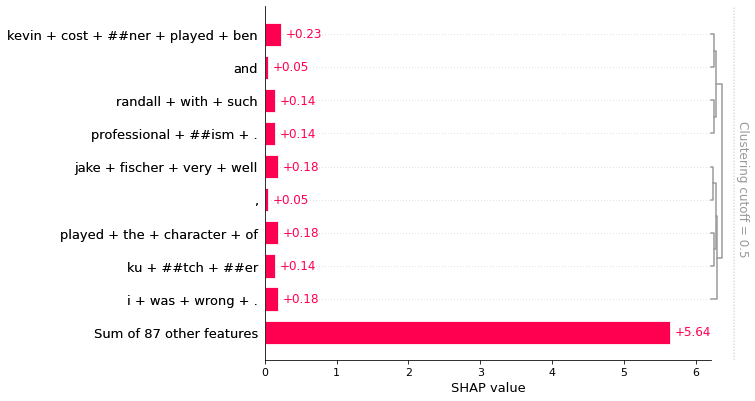

In [ ]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


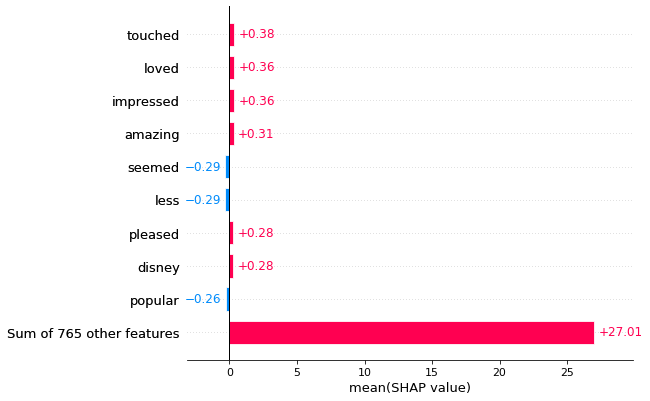

In [ ]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


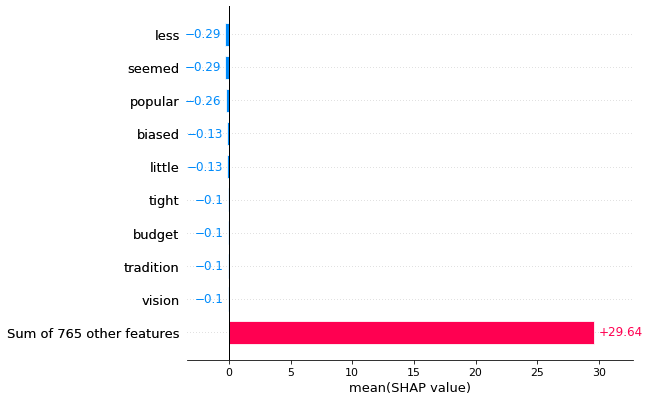

In [ ]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0), order=shap.Explanation.argsort)